In [14]:
import numpy as np

## Parameter definieren

#Zeitraum
tmax = 100          #Zeitraum der Betrachtung (a)

# Aquifer
M = 30             # Mächtigkeit des Aquifers (m)
phi = 0.4          # Porosität des Aquifers
rho_S = 1900         # Dichte 
c_S = 850             # Wärmekapazität
lambda_S = 3.0      # Wärmeleitfähigkeit


kf = 1e-12 * 1000 * 9.81 / 1e-3  #Durchlässigkeitsbeiwert

# Fluid
rho_F = 1500
c_F = 4200

# Dublette
a = 450             # Halber Abstand zwischen Injektions- und Extraktionsbohrung (m)
Q = 0.03            # Injektionsrate = Extraktionsrate (m³/s)

# Grundwasser
v0 = 0.0            # Fließgeschwindigkeit der Grundwasserströmung
#v0 = 0.000000002              # Fließgeschwindigkeit der Grundwasserströmung

alpha = np.pi/2     # Richtung der Grundwasserströmung

#Konstanten
a2s = 365*24*3600   # Umrechnung von Sekunden in Jahre

# Durchbruchszeit bestimmen
rho_A_c_A = phi * rho_F * c_F + (1 - phi) * rho_S * c_S
G = rho_A_c_A / (rho_F * c_F)
tb = G * 4 * np.pi * M * a * a / (3 * Q) /a2s
tmax = 3*tb/G #Zeitraum für die Integration der Stromlinien

vz = 2 * lambda_S / M / rho_A_c_A

print(f"Die Durchbruchszeit beträgt {tb:.2f} Jahre.")
print(f"Erwartete Druckdifferenz in den Bohrungen bei ungestörter Grundwasserströmung {2*a*v0/kf:.2f} Meter")

t = tmax*a2s
L = np.sqrt(2*t*lambda_S/rho_A_c_A)
print(f"Der Einflussbereich im Aquitard beträgt {L:.2f}m")

Die Durchbruchszeit beträgt 14.90 Jahre.
Erwartete Druckdifferenz in den Bohrungen bei ungestörter Grundwasserströmung 0.00 Meter
Der Einflussbereich im Aquitard beträgt 66.15m


Note: the solution for heat transfer does not consider heat exchange with the aquitard.


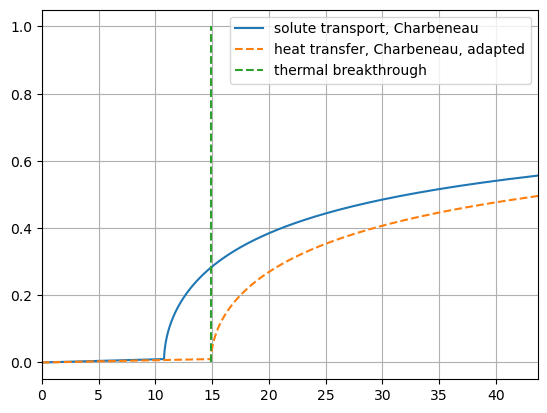

In [ ]:
from scipy.special import erfc
import matplotlib.pyplot as plt

# Formel aus R.J. Charbeneau: Groundwater Hydraulics and Pollutant Transport, 2000
# S. 318 - Formel 6.4.11

F = np.linspace(1e-20, 1, 100)
tf = 4 *np.pi * phi * M * a * a / Q * (1 - np.pi * F / np.tan(np.pi * F)) / (np.sin(np.pi * F) ** 2) / a2s

tb = G * 4 * np.pi * M * a * a / (3 * Q) /a2s

tf2 = G * 4 *np.pi * M * a * a / (3 * Q) / a2s

tau2 = G*tf/phi

print("Note: the solution for heat transfer does not consider heat exchange with the aquitard.")

plt.plot(tf, F, label="solute transport, Charbeneau")
plt.plot(tau2, F, '--', label="heat transfer, Charbeneau, adapted")
plt.plot([tb, tb], [0, 1], '--', label="thermal breakthrough")

plt.grid()
plt.xlim((0, tmax*G-1))
plt.legend()
plt.show()

